## ETF Trading Strategy 


## Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Clean Data

In [4]:
def clean_data(file_path):
    df = pd.read_csv(file_path,skiprows = 1)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(inplace = True)
    df.drop_duplicates(inplace=True)
    cleaned_file_path = file_path
    df.to_csv(cleaned_file_path, index=False)
    df.columns = ["Stock A", "Stock B", "Stock C", "Stock D", "ETF"]
    return df

clean_data("C:/Users/aaron/OneDrive/Desktop/SSMIF Coding Challenge S25/SSMIF Coding Challenge S25/General Coding Challenge S25/price_data.csv")


,Stock A,Stock B,Stock C,Stock D,ETF
0,73.715521,245.751642,320.218202,61.102064,110.399464
1,73.724537,246.076841,319.481307,61.116104,109.217101
2,73.398701,245.894803,318.973277,61.035089,109.424307
3,73.237578,244.821558,320.558393,61.229046,114.903894
4,72.644626,245.641492,321.520657,61.276109,111.868442
...,...,...,...,...,...
9896,88.151368,133.495369,406.365158,82.099212,824.704808
9897,88.104891,132.963816,405.724219,82.075824,822.476295
9898,87.458602,133.134122,405.630868,82.693302,820.930065
9899,87.340871,132.653753,407.596836,83.038879,822.035854


## Strategy

Correlation Matrix:
           Stock A   Stock B   Stock C   Stock D       ETF
Stock A  1.000000  0.271191  0.031271  0.376340  0.020080
Stock B  0.271191  1.000000 -0.050057 -0.293725 -0.724798
Stock C  0.031271 -0.050057  1.000000 -0.007210  0.649328
Stock D  0.376340 -0.293725 -0.007210  1.000000  0.267438
ETF      0.020080 -0.724798  0.649328  0.267438  1.000000


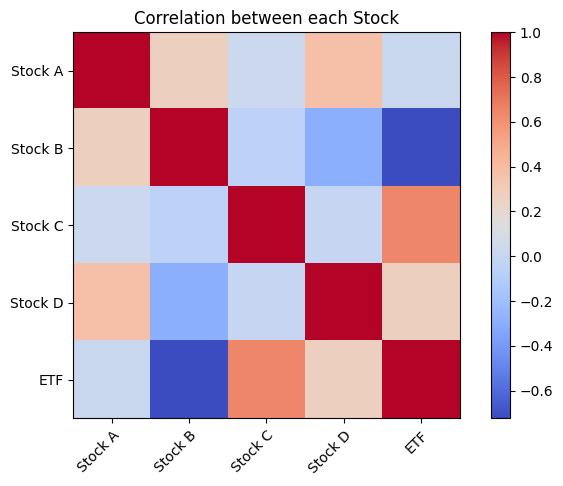

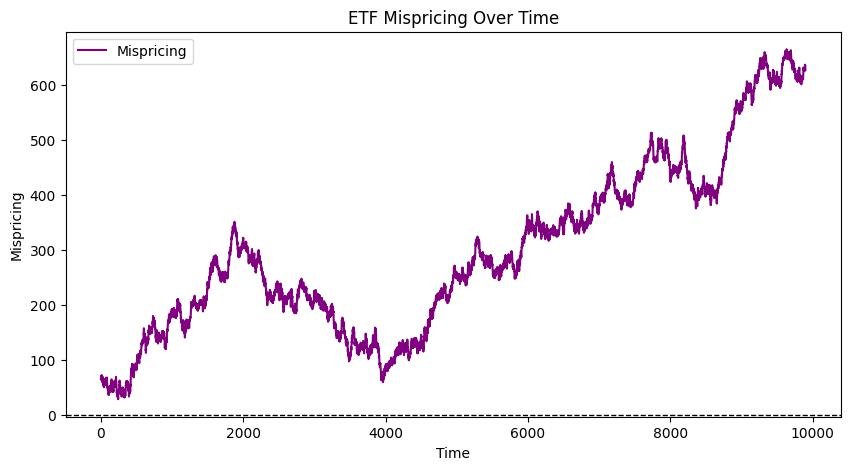

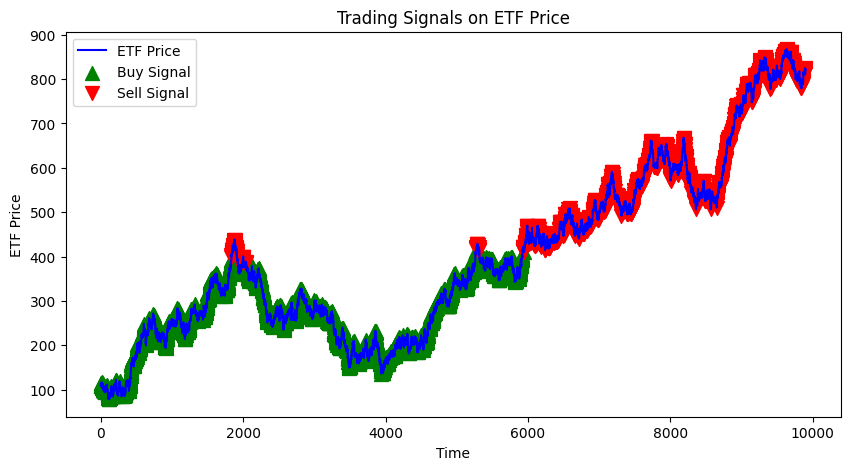

In [5]:
df = clean_data("C:/Users/aaron/OneDrive/Desktop/SSMIF Coding Challenge S25/SSMIF Coding Challenge S25/General Coding Challenge S25/price_data.csv")
stocks = ["Stock A", "Stock B", "Stock C", "Stock D", "ETF"]
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)
fig, ax = plt.subplots()
im = ax.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
ax.set_xticks(np.arange(len(stocks)))
ax.set_yticks(np.arange(len(stocks)))
ax.set_xticklabels(stocks)
ax.set_yticklabels(stocks)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    rotation_mode="anchor")
ax.set_title("Correlation between each Stock")
fig.tight_layout(pad=0.5)
cbar = plt.colorbar(im)
plt.show()

weights = {
    'Stock A': .027,
    'Stock B': -0.725,
    'Stock C': .64,
    'Stock D': .268
}
df["Theoretical_ETF"] = (
    df['Stock A'] * weights['Stock A'] +
    df['Stock B'] * weights['Stock B'] +
    df['Stock C'] * weights['Stock C'] +
    df['Stock D'] * weights['Stock D']
)
df['Mispricing'] = df['ETF'] - df['Theoretical_ETF']

plt.figure(figsize=(10, 5))
plt.plot(df["Mispricing"], label="Mispricing", color="purple")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1) 
plt.title("ETF Mispricing Over Time")
plt.xlabel("Time")
plt.ylabel("Mispricing")
plt.legend()
plt.show()

#threshold = df["Mispricing"].std()
threshold = 2 * df["Mispricing"].std()
df["Signal"] = np.where(df["Mispricing"] < threshold, "BUY", np.where(df["Mispricing"] > threshold, "SELL", "HOLD"))

plt.figure(figsize=(10, 5))
plt.plot(df["ETF"], label="ETF Price", color="blue")

buy_signals = df[df["Signal"] == "BUY"]
plt.scatter(buy_signals.index, buy_signals["ETF"], color="green", label="Buy Signal", marker="^", s = 100)

sell_signals = df[df["Signal"] == "SELL"]
plt.scatter(sell_signals.index, sell_signals["ETF"], color="red", label="Sell Signal", marker="v", s = 100)

plt.title("Trading Signals on ETF Price")
plt.xlabel("Time")
plt.ylabel("ETF Price")
plt.legend()
plt.show()

## Summary

For my trading strategy, first I looked at how each stock correlated with the ETF to understand the weights that I would set for the stocks and the ETF. Based off of the correlation with the use of a heatmap, I adjusted the weights of each stock on the ETF accordingly, with Stock A having a weight of .027, Stock B with 0, Stock C with .65, and Stock D with .323. I then found the theoretical price of the ETF which sums up all of the current prices of each stock for its respective day, and multiplies it by its weights to find the theoretical price of the ETF. To find the mispricings, I took the ETF price from the provided data and subtracted it by the theoretcical price. For my signals, if the mispricings were less than 1 standard deviation away from the threshold(define threshold), then it would buy, but if the mispricings were greater than 1 standard deviation of the threshold, then it would sell. 

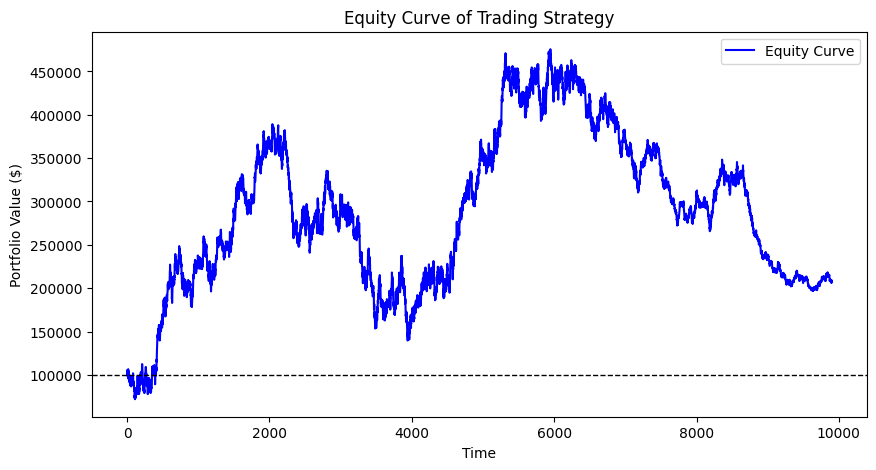

Final Equity: $208,675.15
Total Return: 108.68%
Annualized Volatility: 20.08%
Sharpe Ratio: 0.19


In [ ]:
df["Position"] = 0
df.loc[df["Signal"] == "BUY", "Position"] = 1
df.loc[df["Signal"] == "SELL", "Position"] = -1
df["Position"] = df["Position"].replace(0, np.nan).ffill().fillna(0)


initial_capital = 100_000  


df["ETF_Returns"] = df["ETF"].pct_change()


df["Strategy_Returns"] = df["Position"].shift(1) * df["ETF_Returns"]

df = df.dropna(subset=["Strategy_Returns"])


df["Cumulative_Returns"] = (1 + df["Strategy_Returns"]).cumprod(
df["Equity"] = initial_capital * df["Cumulative_Returns"]


plt.figure(figsize=(10, 5))
plt.plot(df["Equity"], label="Equity Curve", color="blue")
plt.axhline(y=initial_capital, color="black", linestyle="--", linewidth=1)
plt.title("Equity Curve of Trading Strategy")
plt.xlabel("Time")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.show()


final_equity = df["Equity"].iloc[-1]
total_return = (final_equity / initial_capital) - 1
print(f"Final Equity: ${final_equity:,.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Volatility: {df['Strategy_Returns'].std() * np.sqrt(252):.2%}")
print(f"Sharpe Ratio: {df['Strategy_Returns'].mean() / df['Strategy_Returns'].std() * np.sqrt(252):.2f}")
